In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import anderson
from sklearn.preprocessing import MultiLabelBinarizer
from ydata_profiling import ProfileReport

%matplotlib inline

In [113]:
datos = pd.read_csv('data.csv')
datos.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [114]:
# profile = ProfileReport(datos)
# profile.to_file("datosSinTexto.html")
# profile

# Exploración de datos
En el data set podemos encontrar que hay 36 variables disponibles con un total de 858 filas, entre estas filas podemos encontrar que hay únicamente 20 filas duplicadas, lo que representa un 2.3% de los datos totales. Así mismo podemos ver que el data set no cuenta con celdas vacías, sin embargo en la página oficial ellos aseguran que hay datos faltantes por lo que se deberá hacer un análisis más riguroso para determinar esto, lo que sí se puede encontar es el uso de respuestas como "?" haciendo referencia a una respuesta no proporcionada, esto por temas de privacidad del individuo entrevistado. 

También podemos concluir que contamos con 1 variable numérica, la edad, 34 categóricas, que corresponden a las respuestas sobre preguntas no directas, son categóricas debido a que ya fueron procesadas para separar cada una de las respuestas abiertas. Por último el análisis arroja 1 variable textual, sin embargo al revisarla se puede dar cuenta que es un simple error, ya que hace referencia a la cantidad de paquetes de cigarrillos fumados en 1 año, por lo que se tendrá que procesar dichos valores. 

Entre estas variables hay muchas de ellas que poseen una alta correlación con otras variables y esto lo podemos observar en el apartado de alertas del análisis, en este apartado también se observa que se poseen variables de las cuales no están balanceadas, por lo que será necesario tomar acciones para corregir o dejar este comportamiento.

# Tipo de cada variable

| **Nombre de Variable**                          | **Tipo**                  |
|-------------------------------------------------|---------------------------|
| Age                                             | Cuantitativa continua     |
| Number of sexual partners                       | Cuantitativa discreta     |
| First sexual intercourse                        | Cuantitativa continua     |
| Num of pregnancies                              | Cuantitativa discreta     |
| Smokes                                          | Cualitativa               |
| Smokes (years)                                  | Cuantitativa continua     |
| Smokes (packs/year)                             | Cuantitativa continua     |
| Hormonal Contraceptives                         | Cualitativa               |
| Hormonal Contraceptives (years)                 | Cuantitativa continua     |
| IUD                                             | Cualitativa               |
| IUD (years)                                     | Cuantitativa continua     |
| STDs                                            | Cualitativa               |
| STDs (number)                                   | Cuantitativa discreta     |
| STDs: condylomatosis                            | Cualitativa               |
| STDs: cervical condylomatosis                   | Cualitativa               |
| STDs: vaginal condylomatosis                    | Cualitativa               |
| STDs: vulvo-perineal condylomatosis             | Cualitativa               |
| STDs: syphilis                                  | Cualitativa               |
| STDs: pelvic inflammatory disease               | Cualitativa               |
| STDs: genital herpes                            | Cualitativa               |
| STDs: molluscum contagiosum                     | Cualitativa               |
| STDs: AIDS                                      | Cualitativa               |
| STDs: HIV                                       | Cualitativa               |
| STDs: Hepatitis B                               | Cualitativa               |
| STDs: HPV                                       | Cualitativa               |
| STDs: Number of diagnosis                       | Cuantitativa discreta     |
| STDs: Time since first diagnosis                | Cuantitativa continua     |
| STDs: Time since last diagnosis                 | Cuantitativa continua     |
| Dx:Cancer                                       | Cualitativa               |
| Dx:CIN                                          | Cualitativa               |
| Dx:HPV                                          | Cualitativa               |
| Dx                                              | Cualitativa               |
| Hinselmann                                      | Cualitativa               |
| Schiller                                        | Cualitativa               |
| Citology                                        | Cualitativa               |
| Biopsy                                          | Cualitativa               |


# Gráficos exploratorios
Estos pueden ser encontrados en el html

# Análisis de correlación

## Númericas

Debido a que en el presente dataset solo contamos con 1 variable numérica (Age), no se puede realizar una coorrelación con las demas variables, ya que todas las demas variables son categóricas. 

La razón por la que solament la variable de Age es la única variable numérica es que en todas las demas variables existe la posibilidad de que la persona no haya respondido ese dato en concreto, por lo que un porcetaje cosiderable de los datos de muchas columnas que podrian ser numéricas, estan marcados con un "?". Es debido a esto que se deben considerar como variables cartegóricas. 

## Categóricas

In [115]:
datosSinEdad = datos.drop(columns=['Age'])
datosSinEdad.head()

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [116]:
#profile = ProfileReport(datosSinEdad)
#profile

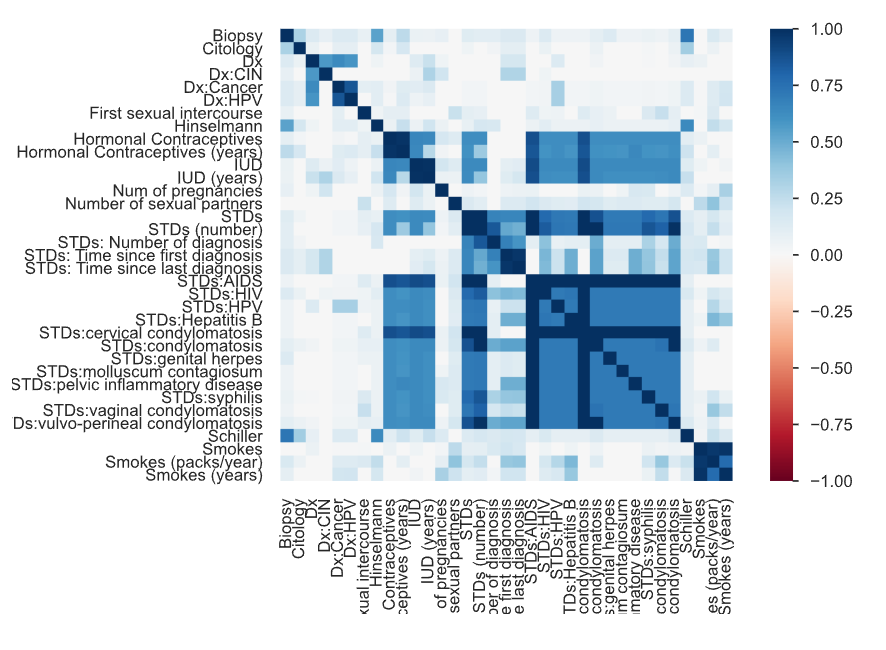

# Variables Categóricas
Estos pueden ser encontrados en el html

# Limpieza de datos

## Valores faltantes

In [117]:
datos.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


Solamente se encontraro valores faltantes en la columna de paquetes de cigarros fumados por año, debido a que solo hay 13 filas en total se decidió por elminar dichas filas ya que es menos del 5% del total de filas.

In [118]:
# Eliminar las filas con valores nulos en la columna Smokes (packs/year)
datos = datos.dropna(subset=['Smokes (packs/year)'])
datos.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [119]:
len(datos)

858

## Analizando las personas que no respondieron

In [120]:
columnas = datos.columns
diccionario = {}

for columna in columnas:
    # Contar cuántas veces aparece '?' en la columna
    diccionario[columna] = datos[columna].eq('?').sum()

print(diccionario)

{'Age': 0, 'Number of sexual partners': 26, 'First sexual intercourse': 7, 'Num of pregnancies': 56, 'Smokes': 13, 'Smokes (years)': 13, 'Smokes (packs/year)': 13, 'Hormonal Contraceptives': 108, 'Hormonal Contraceptives (years)': 108, 'IUD': 117, 'IUD (years)': 117, 'STDs': 105, 'STDs (number)': 105, 'STDs:condylomatosis': 105, 'STDs:cervical condylomatosis': 105, 'STDs:vaginal condylomatosis': 105, 'STDs:vulvo-perineal condylomatosis': 105, 'STDs:syphilis': 105, 'STDs:pelvic inflammatory disease': 105, 'STDs:genital herpes': 105, 'STDs:molluscum contagiosum': 105, 'STDs:AIDS': 105, 'STDs:HIV': 105, 'STDs:Hepatitis B': 105, 'STDs:HPV': 105, 'STDs: Number of diagnosis': 0, 'STDs: Time since first diagnosis': 787, 'STDs: Time since last diagnosis': 787, 'Dx:Cancer': 0, 'Dx:CIN': 0, 'Dx:HPV': 0, 'Dx': 0, 'Hinselmann': 0, 'Schiller': 0, 'Citology': 0, 'Biopsy': 0}


Debido a que en las columnas 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', se tiene un total de 777 personas que no quisieron responder a la pregunta, se decidió por eliminar las columnas, ya que no poseen suficientes datos.

In [121]:
# quitar las columnas STDs: Time since first diagnosis y STDs: Time since last diagnosis
datos = datos.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'])

In [122]:
columnas = datos.columns
diccionario = {}

for columna in columnas:
    # Contar cuántas veces aparece '?' en la columna
    diccionario[columna] = datos[columna].eq('?').sum()

print(diccionario)

{'Age': 0, 'Number of sexual partners': 26, 'First sexual intercourse': 7, 'Num of pregnancies': 56, 'Smokes': 13, 'Smokes (years)': 13, 'Smokes (packs/year)': 13, 'Hormonal Contraceptives': 108, 'Hormonal Contraceptives (years)': 108, 'IUD': 117, 'IUD (years)': 117, 'STDs': 105, 'STDs (number)': 105, 'STDs:condylomatosis': 105, 'STDs:cervical condylomatosis': 105, 'STDs:vaginal condylomatosis': 105, 'STDs:vulvo-perineal condylomatosis': 105, 'STDs:syphilis': 105, 'STDs:pelvic inflammatory disease': 105, 'STDs:genital herpes': 105, 'STDs:molluscum contagiosum': 105, 'STDs:AIDS': 105, 'STDs:HIV': 105, 'STDs:Hepatitis B': 105, 'STDs:HPV': 105, 'STDs: Number of diagnosis': 0, 'Dx:Cancer': 0, 'Dx:CIN': 0, 'Dx:HPV': 0, 'Dx': 0, 'Hinselmann': 0, 'Schiller': 0, 'Citology': 0, 'Biopsy': 0}


Debido a que hay varias columnas en donde se poseen varias personas que no quisieron responder a las preguntas, se tomó la desición de quitar las filas de la columna columna IUD (years), ya que es la que más valores de este tipo posee, para revisar si se eliminan la mayoria de este tipo de respuestas en las demás columnas.

In [123]:
# quitar las filas que en la columna IUD (years) tienen '?'
datos = datos[datos['IUD (years)'] != '?']

In [124]:
columnas = datos.columns
diccionario = {}

for columna in columnas:
    # Contar cuántas veces aparece '?' en la columna
    diccionario[columna] = datos[columna].eq('?').sum()

print(diccionario)

{'Age': 0, 'Number of sexual partners': 14, 'First sexual intercourse': 6, 'Num of pregnancies': 42, 'Smokes': 9, 'Smokes (years)': 9, 'Smokes (packs/year)': 9, 'Hormonal Contraceptives': 3, 'Hormonal Contraceptives (years)': 3, 'IUD': 0, 'IUD (years)': 0, 'STDs': 4, 'STDs (number)': 4, 'STDs:condylomatosis': 4, 'STDs:cervical condylomatosis': 4, 'STDs:vaginal condylomatosis': 4, 'STDs:vulvo-perineal condylomatosis': 4, 'STDs:syphilis': 4, 'STDs:pelvic inflammatory disease': 4, 'STDs:genital herpes': 4, 'STDs:molluscum contagiosum': 4, 'STDs:AIDS': 4, 'STDs:HIV': 4, 'STDs:Hepatitis B': 4, 'STDs:HPV': 4, 'STDs: Number of diagnosis': 0, 'Dx:Cancer': 0, 'Dx:CIN': 0, 'Dx:HPV': 0, 'Dx': 0, 'Hinselmann': 0, 'Schiller': 0, 'Citology': 0, 'Biopsy': 0}


Se quitará las filas de Num of Pregnancies para ver que sucede con el resto de personas que no quisieron responder.

In [125]:
# quitar las filas que en la columna Num of pregnancies diagnosis tienen '?'
datos = datos[datos['Num of pregnancies'] != '?']

In [126]:
columnas = datos.columns
diccionario = {}

for columna in columnas:
    # Contar cuántas veces aparece '?' en la columna
    diccionario[columna] = datos[columna].eq('?').sum()

print(diccionario)

{'Age': 0, 'Number of sexual partners': 12, 'First sexual intercourse': 6, 'Num of pregnancies': 0, 'Smokes': 9, 'Smokes (years)': 9, 'Smokes (packs/year)': 9, 'Hormonal Contraceptives': 2, 'Hormonal Contraceptives (years)': 2, 'IUD': 0, 'IUD (years)': 0, 'STDs': 4, 'STDs (number)': 4, 'STDs:condylomatosis': 4, 'STDs:cervical condylomatosis': 4, 'STDs:vaginal condylomatosis': 4, 'STDs:vulvo-perineal condylomatosis': 4, 'STDs:syphilis': 4, 'STDs:pelvic inflammatory disease': 4, 'STDs:genital herpes': 4, 'STDs:molluscum contagiosum': 4, 'STDs:AIDS': 4, 'STDs:HIV': 4, 'STDs:Hepatitis B': 4, 'STDs:HPV': 4, 'STDs: Number of diagnosis': 0, 'Dx:Cancer': 0, 'Dx:CIN': 0, 'Dx:HPV': 0, 'Dx': 0, 'Hinselmann': 0, 'Schiller': 0, 'Citology': 0, 'Biopsy': 0}


In [127]:
len(datos)

699

Debido a que ya se han quitado la mayoría de filas que no poseían todas las respuestas y siguen habiendo respuestas de este tipo, se buscará generar las respuestas a partir de las medias globales para cada uno de estos casos.

In [128]:
# cambiar los valores que tiene '?' por el promedio de la columna
datos['Number of sexual partners'] = pd.to_numeric(datos['Number of sexual partners'], errors='coerce')
datos['Number of sexual partners'] = datos['Number of sexual partners'].fillna(datos['Number of sexual partners'].mean())

datos['First sexual intercourse'] = pd.to_numeric(datos['First sexual intercourse'], errors='coerce')
datos['First sexual intercourse'] = datos['First sexual intercourse'].fillna(datos['First sexual intercourse'].mean())

datos['Hormonal Contraceptives'] = pd.to_numeric(datos['Hormonal Contraceptives'], errors='coerce')
datos['Hormonal Contraceptives'] = datos['Hormonal Contraceptives'].fillna(datos['Hormonal Contraceptives'].mean())

datos['Hormonal Contraceptives (years)'] = pd.to_numeric(datos['Hormonal Contraceptives (years)'], errors='coerce')
datos['Hormonal Contraceptives (years)'] = datos['Hormonal Contraceptives (years)'].fillna(datos['Hormonal Contraceptives (years)'].mean())

datos['STDs'] = pd.to_numeric(datos['STDs'], errors='coerce')
datos['STDs'] = datos['STDs'].fillna(datos['STDs'].mean())

datos['STDs (number)'] = pd.to_numeric(datos['STDs (number)'], errors='coerce')
datos['STDs (number)'] = datos['STDs (number)'].fillna(datos['STDs (number)'].mean())

datos['STDs:condylomatosis'] = pd.to_numeric(datos['STDs:condylomatosis'], errors='coerce')
datos['STDs:condylomatosis'] = datos['STDs:condylomatosis'].fillna(datos['STDs:condylomatosis'].mean())

datos['STDs:cervical condylomatosis'] = pd.to_numeric(datos['STDs:cervical condylomatosis'], errors='coerce')
datos['STDs:cervical condylomatosis'] = datos['STDs:cervical condylomatosis'].fillna(datos['STDs:cervical condylomatosis'].mean())

datos['STDs:vaginal condylomatosis'] = pd.to_numeric(datos['STDs:vaginal condylomatosis'], errors='coerce')
datos['STDs:vaginal condylomatosis'] = datos['STDs:vaginal condylomatosis'].fillna(datos['STDs:vaginal condylomatosis'].mean())

datos['STDs:vulvo-perineal condylomatosis'] = pd.to_numeric(datos['STDs:vulvo-perineal condylomatosis'], errors='coerce')
datos['STDs:vulvo-perineal condylomatosis'] = datos['STDs:vulvo-perineal condylomatosis'].fillna(datos['STDs:vulvo-perineal condylomatosis'].mean())

datos['STDs:syphilis'] = pd.to_numeric(datos['STDs:syphilis'], errors='coerce')
datos['STDs:syphilis'] = datos['STDs:syphilis'].fillna(datos['STDs:syphilis'].mean())

datos['STDs:pelvic inflammatory disease'] = pd.to_numeric(datos['STDs:pelvic inflammatory disease'], errors='coerce')
datos['STDs:pelvic inflammatory disease'] = datos['STDs:pelvic inflammatory disease'].fillna(datos['STDs:pelvic inflammatory disease'].mean())

datos['STDs:genital herpes'] = pd.to_numeric(datos['STDs:genital herpes'], errors='coerce')
datos['STDs:genital herpes'] = datos['STDs:genital herpes'].fillna(datos['STDs:genital herpes'].mean())

datos['STDs:molluscum contagiosum'] = pd.to_numeric(datos['STDs:molluscum contagiosum'], errors='coerce')
datos['STDs:molluscum contagiosum'] = datos['STDs:molluscum contagiosum'].fillna(datos['STDs:molluscum contagiosum'].mean())

datos['STDs:AIDS'] = pd.to_numeric(datos['STDs:AIDS'], errors='coerce')
datos['STDs:AIDS'] = datos['STDs:AIDS'].fillna(datos['STDs:AIDS'].mean())

datos['STDs:HIV'] = pd.to_numeric(datos['STDs:HIV'], errors='coerce')
datos['STDs:HIV'] = datos['STDs:HIV'].fillna(datos['STDs:HIV'].mean())

datos['STDs:Hepatitis B'] = pd.to_numeric(datos['STDs:Hepatitis B'], errors='coerce')
datos['STDs:Hepatitis B'] = datos['STDs:Hepatitis B'].fillna(datos['STDs:Hepatitis B'].mean())

datos['STDs:HPV'] = pd.to_numeric(datos['STDs:HPV'], errors='coerce')
datos['STDs:HPV'] = datos['STDs:HPV'].fillna(datos['STDs:HPV'].mean())




In [129]:
columnas = datos.columns
diccionario = {}

for columna in columnas:
    # Contar cuántas veces aparece '?' en la columna
    diccionario[columna] = datos[columna].eq('?').sum()

print(diccionario)

{'Age': 0, 'Number of sexual partners': 0, 'First sexual intercourse': 0, 'Num of pregnancies': 0, 'Smokes': 9, 'Smokes (years)': 9, 'Smokes (packs/year)': 9, 'Hormonal Contraceptives': 0, 'Hormonal Contraceptives (years)': 0, 'IUD': 0, 'IUD (years)': 0, 'STDs': 0, 'STDs (number)': 0, 'STDs:condylomatosis': 0, 'STDs:cervical condylomatosis': 0, 'STDs:vaginal condylomatosis': 0, 'STDs:vulvo-perineal condylomatosis': 0, 'STDs:syphilis': 0, 'STDs:pelvic inflammatory disease': 0, 'STDs:genital herpes': 0, 'STDs:molluscum contagiosum': 0, 'STDs:AIDS': 0, 'STDs:HIV': 0, 'STDs:Hepatitis B': 0, 'STDs:HPV': 0, 'STDs: Number of diagnosis': 0, 'Dx:Cancer': 0, 'Dx:CIN': 0, 'Dx:HPV': 0, 'Dx': 0, 'Hinselmann': 0, 'Schiller': 0, 'Citology': 0, 'Biopsy': 0}


In [130]:
datos.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [131]:
#profile = ProfileReport(datos)
#profile

Num of pregnancies
Smokes (years)

In [132]:
# sacar el tipo de dato de cada columna
datos.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                     object
Smokes                                 object
Smokes (years)                         object
Smokes (packs/year)                    object
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                    object
IUD (years)                            object
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

# Estudie si es posible hacer transformaciones en las variables categóricas para incluirlas en el PCA

Si es importante hacer transformaciones a las variables, debido a que la cantidad de variables que se deben transformar son pocas, y únicamente es de cambiar el tipo de dato con el que están representadas.

In [133]:
#convertir Num of pregnancies a int
datos['Num of pregnancies'] = pd.to_numeric(datos['Num of pregnancies'], errors='coerce')

#convertir Smokes a int
datos['Smokes'] = pd.to_numeric(datos['Smokes'], errors='coerce')

#convertir Smokes (years) a float
datos['Smokes (years)'] = pd.to_numeric(datos['Smokes (years)'], errors='coerce')

#convertir Smokes (packs/year) a float
datos['Smokes (packs/year)'] = pd.to_numeric(datos['Smokes (packs/year)'], errors='coerce')

#convertir IUD a int
datos['IUD'] = pd.to_numeric(datos['IUD'], errors='coerce')

#convertir IUD (years) a float
datos['IUD (years)'] = pd.to_numeric(datos['IUD (years)'], errors='coerce')


In [134]:
datos.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [135]:
len(datos.columns)

34

In [136]:
datos.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.116883,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.000000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.000000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [138]:
# profile = ProfileReport(datos)
# profile.to_file("datosSinTexto2.html")

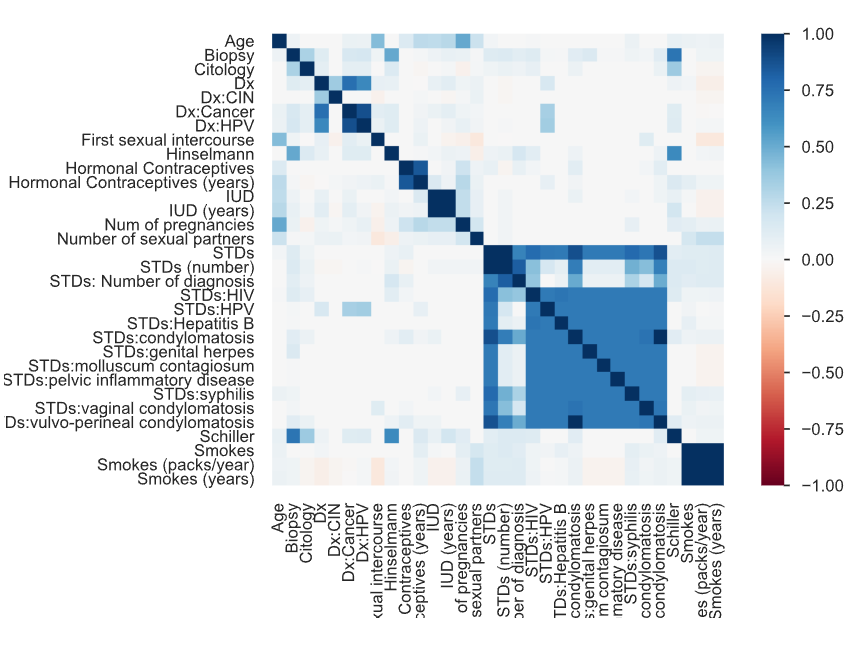

Si vale la pena incluir el análisis de PCA debido a que si analizamos el mapa de calor de la matriz de correlación se puede observar que hay una alta correlación entre varias variables, como lo son los índices del tabaquismo, la enfermedades ETS y los métodos anticonceptivos. Esto es una buena señal que aplicando dicho análisis se pueden reducir la cantidad de variables a analizar y así encontrar aquellas que no aportan información significativa o que pueden estar influenciadas o incluidas en otras variables, reduciendo la redundancia, potenciando el análisis en las variables que aporten información importante.


González, F. (2023, mayo 5). Análisis de Componentes Principales (PCA). Linkedin.com. https://www.linkedin.com/pulse/an%C3%A1lisis-de-componentes-principales-pca-francisco-gonz%C3%A1lez/

[Github](https://github.com/angelcast2002/Lab-01.git)

In [139]:
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [140]:
# Extraer solo las columnas numéricas
datos_numericos = datos.select_dtypes(include=[np.number])

# Revisar si hay valores nulos o infinitos
print("Valores nulos por columna:\n", datos_numericos.isnull().sum())

Valores nulos por columna:
 Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                9
Smokes (years)                        9
Smokes (packs/year)                   9
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV    

In [141]:
print("Hay valores infinitos:", np.isinf(datos_numericos).values.any())

Hay valores infinitos: False


In [143]:
datos_numericos.replace([np.inf, -np.inf], np.nan, inplace=True)

In [144]:
datos_numericos.dropna(inplace=True)


In [145]:
scaler = StandardScaler()
datos_numericos_scaled = scaler.fit_transform(datos_numericos)


In [146]:
selector = VarianceThreshold(threshold=0.01)  
datos_numericos_var = selector.fit_transform(datos_numericos)

datos_numericos_scaled = scaler.fit_transform(datos_numericos_var)

In [147]:
kmo_all, kmo_model = calculate_kmo(datos_numericos_scaled)
print("Índice KMO:", kmo_model)

Índice KMO: 0.6860062844311751


c:\Users\caste\anaconda3\envs\base11\Lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [148]:
# Calcular la prueba de esfericidad de Bartlett
chi_square_value, p_value = calculate_bartlett_sphericity(datos_numericos_scaled)
print("Prueba de esfericidad de Bartlett: Chi-cuadrado =", chi_square_value, ", p-value =", p_value)

Prueba de esfericidad de Bartlett: Chi-cuadrado = 13403.064971381906 , p-value = 0.0


Un valor de 0.686 sugiere que el muestreo es adecuado para realizar PCA, aunque generalmente se prefiere un valor superior a 0.7. El valor de Chi-cuadrado muy alto y el p-value de 0.0 indican que la matriz de correlación no es una matriz de identidad, lo que significa que las variables están correlacionadas y es apropiado aplicar PCA.

In [149]:
from sklearn.decomposition import PCA
import numpy as np

In [150]:
#PCA 
pca = PCA()
principalComponents = pca.fit_transform(datos_numericos_scaled)
principalDf = pd.DataFrame(data = principalComponents)

In [151]:
# Obtener la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:", explained_variance)

Varianza explicada por cada componente principal: [0.18974148 0.12476658 0.09985074 0.08101446 0.07973958 0.06261519
 0.05257285 0.04978004 0.03881558 0.03810389 0.0327426  0.03100912
 0.02256655 0.019774   0.01730135 0.01251266 0.010439   0.0098504
 0.00854282 0.00671434 0.00426149 0.00316325 0.00281693 0.00086789
 0.00043724]


In [152]:
# Obtener los componentes principales
principal_components = pca.components_
print("Componentes principales:\n", principal_components)

Componentes principales:
 [[ 9.30545983e-03  1.99796410e-02 -8.06537659e-03  2.57016832e-02
   8.98080182e-02  8.54332447e-02  4.56924169e-02 -1.82343850e-02
   3.06153399e-03  4.15185337e-02  2.15095109e-02  4.26540820e-01
   4.45936751e-01  3.96140820e-01  3.93773632e-01  1.54932831e-01
   1.94829418e-01  4.22224829e-01  1.17342193e-02  1.35485703e-02
  -3.51104314e-04  9.64629277e-02  1.29287968e-01  7.14654333e-02
   1.19752384e-01]
 [ 1.88768925e-01  5.43773099e-02  3.60704190e-02  1.59583526e-01
   7.39119397e-02  1.43161283e-01  1.25251240e-01  6.23019179e-02
   1.16125058e-01  1.67316797e-01  1.40834654e-01 -6.27485297e-02
  -7.87484850e-02 -8.38990468e-02 -8.24726422e-02 -5.50418298e-02
   6.61631227e-03 -7.06566208e-02  4.38634547e-01  4.24232039e-01
   3.73573992e-01  2.58210463e-01  3.04632057e-01  1.74725918e-01
   3.06302521e-01]
 [ 2.52620791e-01  2.16361728e-01 -4.05035582e-02  2.56424344e-01
   4.39856215e-01  4.99629012e-01  4.39251220e-01  6.67726668e-02
   1.1225493

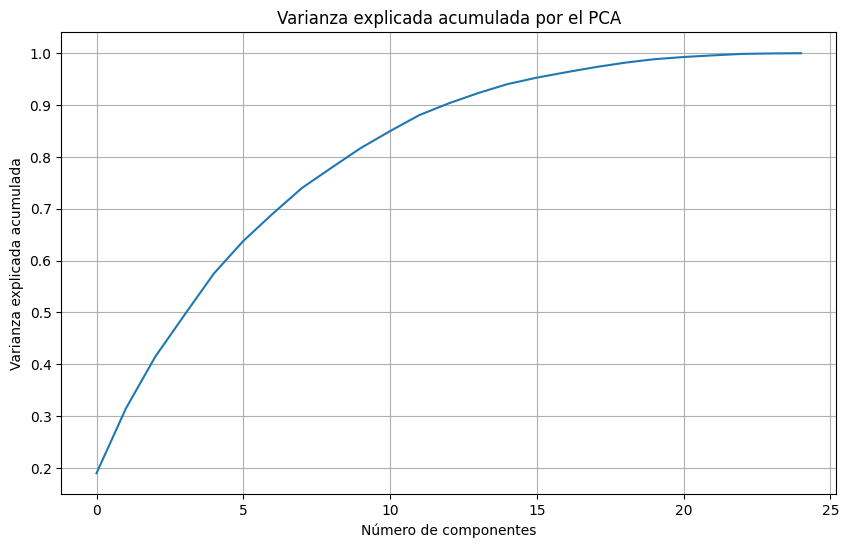

In [153]:
# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por el PCA')
plt.grid(True)
plt.show()

**Gráfica 1: Varianza explicada acumulada por el PCA**

La gráfica de varianza explicada acumulada muestra cómo la varianza total de los datos originales se acumula a medida que se agregan más componentes principales. Observamos que los primeros componentes capturan la mayor parte de la varianza, con la curva aumentando rápidamente al principio y luego aplanándose. Esto indica que unos pocos componentes iniciales son suficientes para explicar la mayoría de la variabilidad en los datos, y a partir del componente 10-15, la adición de más componentes contribuye marginalmente a la varianza explicada total.

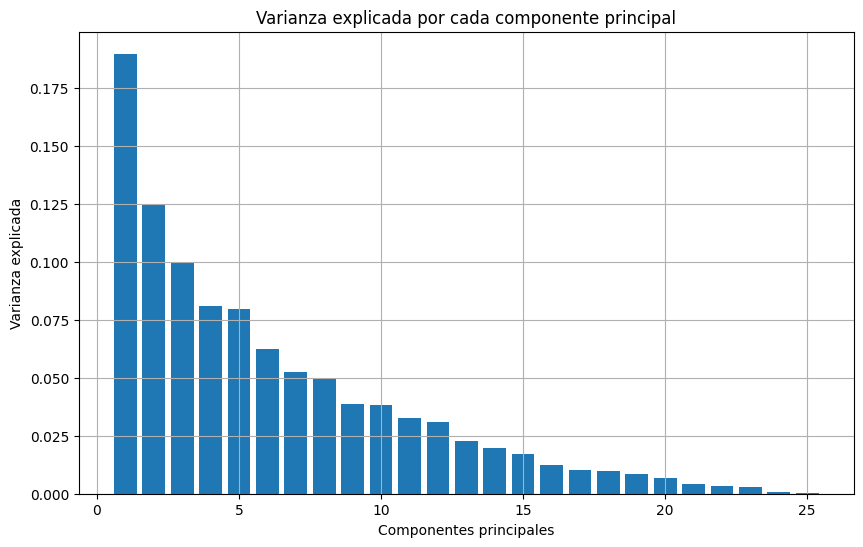

In [154]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Componentes principales')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada por cada componente principal')
plt.grid(True)
plt.show()

**Gráfica 2: Varianza explicada por cada componente principal**

La gráfica de varianza explicada por cada componente principal revela la contribución individual de cada componente a la varianza total de los datos. Las primeras barras son significativamente más altas, mostrando que los primeros componentes principales tienen un mayor peso en la explicación de la varianza. Conforme avanzamos a componentes posteriores, la cantidad de varianza explicada disminuye rápidamente, indicando que los componentes adicionales explican cada vez menos información relevante, lo que sugiere que es posible reducir la dimensionalidad sin perder demasiada información.

# Discretización de Variables Numéricas
Las variables numéricas que se someteran a este proceso son las siguientes:
- Age
- Number of sexual partners
- First sexual intercourse
- Num of pregnancies
- Smokes (years)
- Smokes (packs/years)
- Hormonal Contraceptives (years)
- IUD (years)
- STDs (number)
Debido a que son las únicas numéricas luego de la manipulación del dataset, como se puede observar en el html llamado datosSinTexto2

In [155]:
print(datos["Age"])

0      18
1      15
2      34
3      52
4      46
       ..
853    34
854    32
855    25
856    33
857    29
Name: Age, Length: 699, dtype: int64


In [168]:
def create_bins(column, num_bins):
    print("Column:", column)
    min_value = column.min()
    max_value = column.max()
    step = (max_value - min_value) / num_bins
    print("Min:", min_value, ", Max:", max_value, ", Step:", step)
    return np.arange(min_value, max_value + step, step)

num_bins = 5

In [169]:
columns_to_categorize = [
    'Age', 'Number of sexual partners', 'First sexual intercourse',
    'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
    'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)'
]
newDataFrame = datos.copy()

for column in columns_to_categorize:
    newDataFrame[column] = pd.to_numeric(datos[column], errors='coerce')
    # Assuming create_bins function is defined to take the series and num_bins as input
    bins = create_bins(newDataFrame[column], num_bins)  # Pass the numeric data, not the column name
    print(f"Bins for {column}:", bins)
    # Ensure one less label than the number of bin edges
    labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]
    # Use the converted numeric data for binning
    newDataFrame[column] = pd.cut(newDataFrame[column], bins=bins, labels=labels, include_lowest=True)


Column: 0      18
1      15
2      34
3      52
4      46
       ..
853    34
854    32
855    25
856    33
857    29
Name: Age, Length: 699, dtype: int64
Min: 13 , Max: 84 , Step: 14.2
Bins for Age: [13.  27.2 41.4 55.6 69.8 84.  98.2]
Column: 0      4.0
1      1.0
2      1.0
3      5.0
4      3.0
      ... 
853    3.0
854    2.0
855    2.0
856    2.0
857    2.0
Name: Number of sexual partners, Length: 699, dtype: float64
Min: 1.0 , Max: 28.0 , Step: 5.4
Bins for Number of sexual partners: [ 1.   6.4 11.8 17.2 22.6 28. ]
Column: 0      15.000000
1      14.000000
2      17.116883
3      16.000000
4      21.000000
         ...    
853    18.000000
854    19.000000
855    17.000000
856    24.000000
857    20.000000
Name: First sexual intercourse, Length: 699, dtype: float64
Min: 10.0 , Max: 32.0 , Step: 4.4
Bins for First sexual intercourse: [10.  14.4 18.8 23.2 27.6 32. ]
Column: 0      1.0
1      1.0
2      1.0
3      4.0
4      4.0
      ... 
853    0.0
854    1.0
855    0.0
856    2.

In [170]:
newDataFrame.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,13-27,1-6,14-18,0-2,0.0,0-7,0-7,0.0,0-4,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,13-27,1-6,10-14,0-2,0.0,0-7,0-7,0.0,0-4,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,27-41,1-6,14-18,0-2,0.0,0-7,0-7,0.0,0-4,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,41-55,1-6,14-18,2-4,1.0,29-37,29-37,1.0,0-4,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,41-55,1-6,18-23,2-4,0.0,0-7,0-7,1.0,13-17,0.0,...,0.0,0,0,0,0,0,0,0,0,0


# Reglas de asociación, utilizando Apriori

In [190]:
one_hot = pd.get_dummies(newDataFrame)
one_hot.head()

,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,...,IUD (years)_3-7,IUD (years)_7-11,IUD (years)_11-15,IUD (years)_15-19,IUD (years)_19-22,STDs (number)_0-0,STDs (number)_0-1,STDs (number)_1-2,STDs (number)_2-3,STDs (number)_3-4
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False


In [191]:
from mlxtend.frequent_patterns import apriori, association_rules
one_hot = one_hot.astype(bool)
frequent_itemsets = apriori(one_hot, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Smokes),(Hormonal Contraceptives),0.153076,0.643777,0.097282,0.635514,0.987165,-0.001265,0.977330,-0.015120
1,(Smokes),(Number of sexual partners_1-6),0.153076,0.982833,0.143062,0.934579,0.950904,-0.007386,0.262416,-0.057460
2,(Smokes),(First sexual intercourse_14-18),0.153076,0.683834,0.113019,0.738318,1.079674,0.008340,1.208206,0.087132
3,(Smokes),(Smokes (packs/year)_0-7),0.153076,0.971388,0.124464,0.813084,0.837034,-0.024232,0.153076,-0.186916
4,(Smokes),(Hormonal Contraceptives (years)_0-4),0.153076,0.799714,0.113019,0.738318,0.923227,-0.009398,0.765379,-0.089408
...,...,...,...,...,...,...,...,...,...,...
56572,"(Hormonal Contraceptives, Smokes (years)_0-7, ...","(IUD (years)_0-3, Number of sexual partners_1-...",0.201717,0.542203,0.137339,0.680851,1.255712,0.027968,1.434430,0.255096
56573,"(Age_13-27, Num of pregnancies_0-2, First sexu...","(IUD (years)_0-3, Number of sexual partners_1-...",0.190272,0.629471,0.137339,0.721805,1.146685,0.017569,1.331903,0.157980
56574,"(Num of pregnancies_0-2, Hormonal Contraceptiv...","(IUD (years)_0-3, Number of sexual partners_1-...",0.185980,0.479256,0.137339,0.738462,1.540850,0.048207,1.991080,0.431202
56575,"(Age_13-27, Num of pregnancies_0-2, Hormonal C...","(IUD (years)_0-3, Number of sexual partners_1-...",0.210300,0.537911,0.137339,0.653061,1.214069,0.024216,1.331903,0.223279


Debido a que con este método se generaron más de 50000 reglas, lo cual lo convierte en un desafio para analizar dichas reglas, se aplicaran diferentes métodos para reducir dichas reglas y llegar a conclusiones con mayor valor.

In [204]:
frequent_itemsets = apriori(one_hot, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
print(f"Reglas totales: {len(rules)}")

Reglas totales: 8176


In [205]:
rules = rules[rules['lift'] > 1.5]
print(f"Reglas totales luego de filtrar por importancia: {len(rules)}")

Reglas totales luego de filtrar por importancia: 176


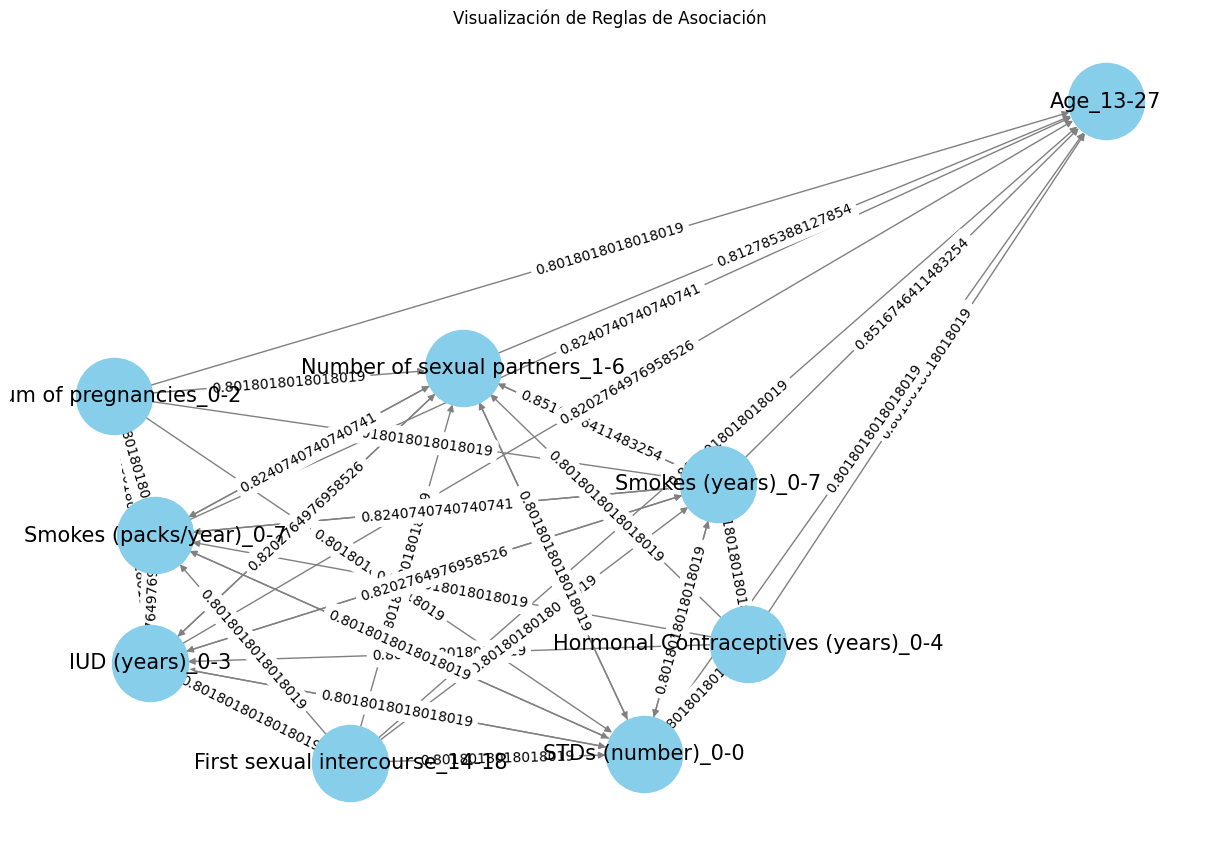

In [206]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for _, row in rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['confidence'])

pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=15, font_color='black', edge_color='grey')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Visualización de Reglas de Asociación')
plt.show()

In [208]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
805,"(Num of pregnancies_0-2, Hormonal Contraceptiv...",(Age_13-27),0.350501,0.565093,0.297568,0.848980,1.502371,0.099502,2.879790,0.514836
2186,"(Number of sexual partners_1-6, Hormonal Contr...",(Age_13-27),0.343348,0.565093,0.293276,0.854167,1.511551,0.099253,2.982219,0.515383
2190,"(Num of pregnancies_0-2, Hormonal Contraceptiv...","(Age_13-27, Number of sexual partners_1-6)",0.350501,0.553648,0.293276,0.836735,1.511312,0.099222,2.733906,0.520898
2506,"(Num of pregnancies_0-2, Hormonal Contraceptiv...",(Age_13-27),0.327611,0.565093,0.287554,0.877729,1.553247,0.102423,3.556918,0.529734
2510,"(Num of pregnancies_0-2, Hormonal Contraceptiv...","(Age_13-27, Smokes (years)_0-7)",0.350501,0.543634,0.287554,0.820408,1.509119,0.097010,2.541130,0.519418
...,...,...,...,...,...,...,...,...,...,...
8153,"(IUD (years)_0-3, STDs (number)_0-0, Num of pr...","(Smokes (packs/year)_0-7, Number of sexual par...",0.310443,0.535050,0.254649,0.820276,1.533084,0.088547,2.587029,0.504266
8159,"(Number of sexual partners_1-6, STDs (number)_...","(Smokes (packs/year)_0-7, IUD (years)_0-3, Smo...",0.313305,0.529328,0.254649,0.812785,1.535505,0.088809,2.514079,0.507865
8164,"(STDs (number)_0-0, Smokes (packs/year)_0-7, N...","(Age_13-27, IUD (years)_0-3, Number of sexual ...",0.309013,0.523605,0.254649,0.824074,1.573846,0.092849,2.707929,0.527671
8166,"(STDs (number)_0-0, Num of pregnancies_0-2, Sm...","(Smokes (packs/year)_0-7, IUD (years)_0-3, Num...",0.298999,0.532189,0.254649,0.851675,1.600324,0.095526,3.153953,0.535130


Aún habiendo hecho esto las reglas son bastantes, y sería complicado analizar todas y cada una de ellas es por esto que nos enfocaremos solamente en 10 items, basados en la opinión de un médico, ya que nosotros no somos expertos en el tema.

Total rules after filtering: 7


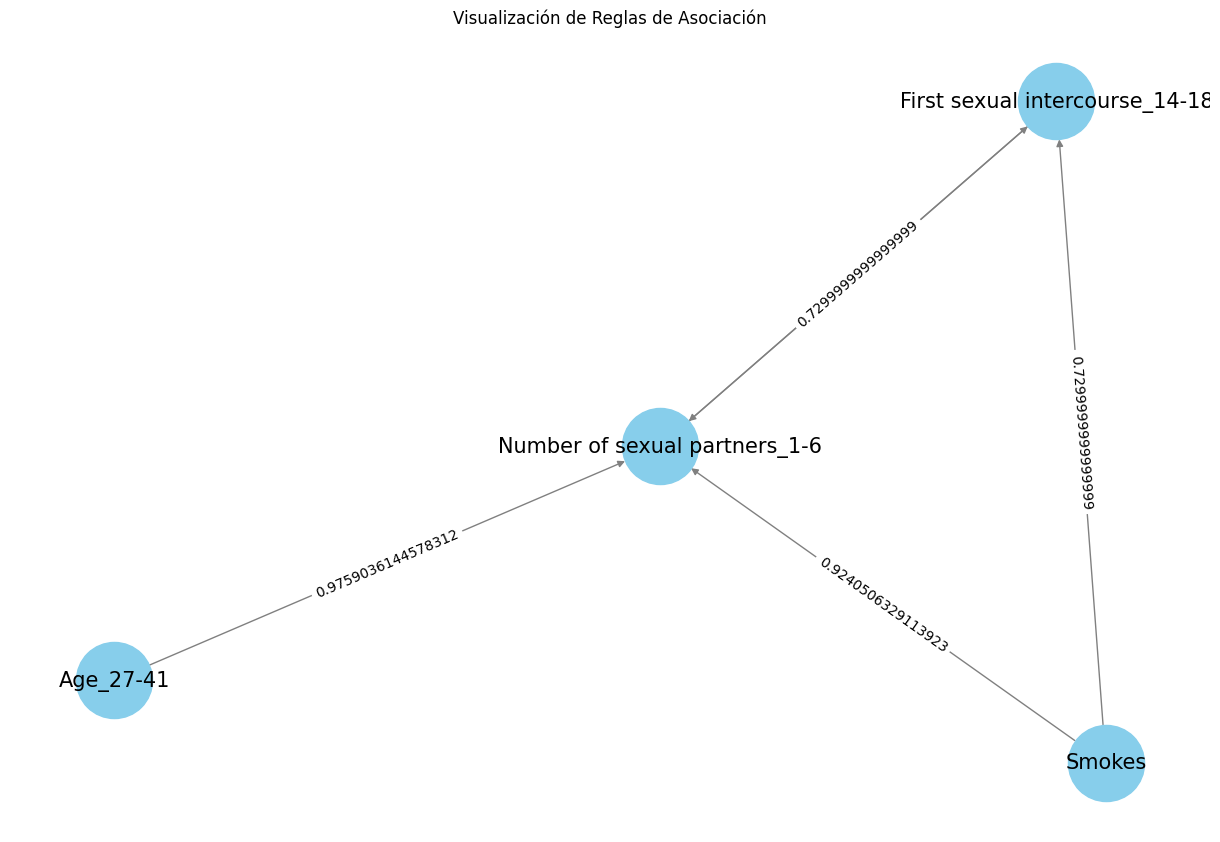

In [220]:
selected_items = [
    'Dx:Cancer', 'Dx:HPV', 'Dx:CIN',
    'STDs:HPV', 'Smokes',
    'Biopsy', 'Citology',
    'Age_27-41',
    'First sexual intercourse_14-18',
    'Number of sexual partners_1-6'
]

filtered_df = one_hot[selected_items]

# Aplicar Apriori
frequent_itemsets = apriori(filtered_df, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Filtrar por lift
rules = rules[rules['lift'] > 0.7]

print(f"Total rules after filtering: {len(rules)}")

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for _, row in rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['confidence'])

pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=15, font_color='black', edge_color='grey')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Visualización de Reglas de Asociación')
plt.show()

Los 10 items fueron seleccionados debido a su relevancia clínica y su relación directa con el riesgo de cáncer cervical, además de las indicaciones del experto, quien decidió mantenerse en el anonimato.

En el gráfico, se muestran las reglas de asociación que revelan patrones frecuentes entre ciertos atributos relacionados con la salud.

1. Nodos y Aristas:

    - Los nodos representan atributos importantes como "Primera relación sexual entre 14 y 18 años", "Número de parejas sexuales entre 1 y 6", "Fuma" y "Edad entre 27 y 41 años".
    - Las aristas entre los nodos indican reglas de asociación, donde la dirección de las flechas muestra la implicación de un atributo hacia otro.

2. Relaciones y Confianza:

    - Las etiquetas en las aristas reflejan la confianza en las reglas. Por ejemplo, una confianza del 72.99% entre "Primera relación sexual entre 14 y 18 años" y "Número de parejas sexuales entre 1 y 6" indica que es muy probable que alguien que tuvo su primera relación en ese rango de edad tenga entre 1 y 6 parejas sexuales.
    - De manera similar, otras aristas muestran la confianza en la relación entre "Fuma" y "Número de parejas sexuales entre 1 y 6" con una confianza del 92.41%, y entre "Edad entre 27 y 41 años" y "Número de parejas sexuales entre 1 y 6" con una confianza del 97.59%.
3. Interpretación en el Contexto del Cáncer Cervical:

    - Estas reglas de asociación ayudan a identificar patrones que podrían estar relacionados con el riesgo de cáncer cervical.
    - Por ejemplo, las pacientes que tuvieron su primera relación sexual entre los 14 y 18 años y tienen entre 1 y 6 parejas sexuales, o que fuman, podrían estar en un grupo de mayor riesgo.
    - Este análisis es útil para desarrollar estrategias de prevención y programas educativos específicos para pacientes con estas características.